TOOL part 1
Hello, 
Here is where your measurements/ coordinates are converted a valiable river discharge using Leopolds method.
What do you need:
- At least 3 sets of coordinates for river cross-sections



First all necessary calculations are collected 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import sys

Here we collecting the input of the area, or your first assumptions

In [2]:
slope = 0.0055
Manning_coefficient = 0.0516 #Manning coefficient

Here we collect your coordinates

In [3]:
# These are some example coordinates
coords_riverspeed = [#(35.86472902, -1.08914448, 1838.426),
#(35.86471935, -1.08914986, 1838.096),
#(35.86470925, -1.08915243, 1837.752),
#(35.86469950, -1.08915450, 1837.712),
#(35.86468912, -1.08915769, 1837.479),
#(35.86468045, -1.08916274, 1837.081),
#(35.86467385, -1.08916571, 1836.732),
#(35.86466460, -1.08916947, 1836.287),
(35.86465579, -1.08917202, 1836.129),
(35.86464745, -1.08917260, 1835.696),
(35.86464315, -1.08917175, 1835.438),
(35.86463661, -1.08917361, 1835.323),
(35.86463141, -1.08917526, 1835.470),
(35.86462372, -1.08917706, 1835.472),
(35.86461637, -1.08917834, 1835.432),
(35.86460971, -1.08918027, 1835.419),
(35.86460265, -1.08918194, 1835.305),
(35.86459620, -1.08918314, 1835.279),
(35.86458986, -1.08918430, 1835.084),
(35.86458811, -1.08918535, 1835.107),
(35.86458171, -1.08918569, 1835.038),
(35.86457396, -1.08918689, 1834.992),
(35.86456881, -1.08919287, 1834.818),
(35.86456223, -1.08919530, 1834.868),
(35.86455437, -1.08919704, 1834.856),
(35.86454700, -1.08919891, 1834.866),
(35.86454179, -1.08920101, 1834.835),
(35.86453667, -1.08920324, 1834.877),
(35.86452841, -1.08920569, 1834.988),
(35.86452213, -1.08920868, 1834.763),
(35.86451386, -1.08921186, 1834.970),
(35.86450630, -1.08921544, 1834.963),
(35.86449970, -1.08921754, 1835.249),
(35.86449265, -1.08921854, 1835.513),
(35.86448647, -1.08921878, 1836.158)
#(35.86447838, -1.08921772, 1836.633),
#(35.86447010, -1.08922006, 1837.108),
#(35.86446262, -1.08922441, 1842.017),
#(35.86443703, -1.08924910, 1836.407),
#(35.86443844, -1.08924723, 1836.449),
#(35.86444159, -1.08923810, 1838.604)
]

coords_rivercanal23 = [(35.86866120, -1.09055483, 1831.392),
(35.86865129, -1.09054443, 1830.686),
(35.86864123, -1.09053354, 1830.772),
(35.86863672, -1.09052811, 1830.746),
(35.86863133, -1.09051826, 1829.213),
(35.86862314, -1.09050774, 1829.064),
(35.86862010, -1.09049991, 1828.676),
(35.86861371, -1.09048936, 1828.498),
(35.86860851, -1.09048124, 1828.282),
(35.86860426, -1.09047486, 1828.198),
(35.86859776, -1.09046923, 1828.312),
(35.86859113, -1.09046438, 1828.127),
(35.86858202, -1.09045505, 1828.165),
(35.86857464, -1.09044956, 1828.084),
(35.86857159, -1.09044622, 1828.133),
(35.86856432, -1.09043756, 1828.354),
(35.86855613, -1.09042965, 1828.427),
(35.86854969, -1.09042131, 1828.399),
(35.86853969, -1.09041492, 1828.435),
(35.86852914, -1.09040376, 1828.111),
(35.86852267, -1.09039606, 1828.541),
(35.86851491, -1.09039099, 1828.395),
(35.86851155, -1.09038572, 1828.863),
(35.86850406, -1.09037998, 1828.541),
(35.86849688, -1.09037528, 1828.789),
(35.86849011, -1.09036726, 1828.373),
(35.86848468, -1.09036298, 1828.451),
(35.86847965, -1.09035660, 1828.377),
(35.86847130, -1.09035025, 1828.331),
(35.86845983, -1.09034525, 1828.735),
(35.86845402, -1.09034020, 1829.188),
(35.86844429, -1.09033261, 1829.251),
(35.86843449, -1.09032682, 1829.768),
(35.86842663, -1.09032428, 1831.673)
]

coords_riverdown1 = [(35.86898721, -1.09662167, 1827.712),
(35.86898602, -1.09662247, 1827.132),
(35.86900320, -1.09663580, 1826.836),
(35.86901579, -1.09664870, 1826.811),
(35.86902973, -1.09666305, 1826.685),
(35.86904399, -1.09667769, 1826.553),
(35.86905602, -1.09669411, 1826.455),
(35.86906204, -1.09670502, 1826.027),
(35.86907040, -1.09671788, 1825.650),
(35.86907517, -1.09672888, 1824.958),
(35.86907932, -1.09673866, 1824.363),
(35.86908349, -1.09674432, 1824.092),
(35.86908866, -1.09675381, 1823.670),
(35.86909511, -1.09676055, 1823.576),
(35.86910391, -1.09677039, 1823.577),
(35.86911042, -1.09677777, 1823.357),
(35.86911327, -1.09678694, 1823.327),
(35.86911958, -1.09679627, 1823.329),
(35.86912553, -1.09680259, 1823.394),
(35.86912941, -1.09681438, 1823.602),
(35.86913686, -1.09682432, 1823.668),
(35.86914441, -1.09683746, 1823.844),
(35.86915113, -1.09685050, 1823.877),
(35.86915974, -1.09686259, 1824.063),
(35.86916596, -1.09687391, 1824.185),
(35.86917660, -1.09688708, 1824.418),
(35.86918496, -1.09690337, 1824.636),
(35.86919171, -1.09691878, 1824.788),
(35.86920066, -1.09693399, 1825.086),
(35.86920442, -1.09694129, 1825.245),
(35.86920979, -1.09694741, 1825.872),
(35.86921827, -1.09695768, 1826.137),
(35.86924329, -1.09700183, 1826.103),
(35.86925816, -1.09703456, 1826.477),
(35.86926510, -1.09704992, 1826.925),
(35.86927714, -1.09706994, 1827.538),
(35.86927794, -1.09707436, 1828.281)
]

coords_riverbegin2 = [(35.86472902, -1.08914448, 1838.426),
(35.86471935, -1.08914986, 1838.096),
(35.86470925, -1.08915243, 1837.752),
(35.86469950, -1.08915450, 1837.712),
(35.86468912, -1.08915769, 1837.479),
(35.86468045, -1.08916274, 1837.081),
(35.86467385, -1.08916571, 1836.732),
(35.86466460, -1.08916947, 1836.287),
(35.86465579, -1.08917202, 1836.129),
(35.86464745, -1.08917260, 1835.696),
(35.86464315, -1.08917175, 1835.438),
(35.86463661, -1.08917361, 1835.323),
(35.86463141, -1.08917526, 1835.470),
(35.86462372, -1.08917706, 1835.472),
(35.86461637, -1.08917834, 1835.432),
(35.86460971, -1.08918027, 1835.419),
(35.86460265, -1.08918194, 1835.305),
(35.86459620, -1.08918314, 1835.279),
(35.86458986, -1.08918430, 1835.084),
(35.86458811, -1.08918535, 1835.107),
(35.86458171, -1.08918569, 1835.038),
(35.86457396, -1.08918689, 1834.992),
(35.86456881, -1.08919287, 1834.818),
(35.86456223, -1.08919530, 1834.868),
(35.86455437, -1.08919704, 1834.856),
(35.86454700, -1.08919891, 1834.866),
(35.86454179, -1.08920101, 1834.835),
(35.86453667, -1.08920324, 1834.877),
(35.86452841, -1.08920569, 1834.988),
(35.86452213, -1.08920868, 1834.763),
(35.86451386, -1.08921186, 1834.970),
(35.86450630, -1.08921544, 1834.963),
(35.86449970, -1.08921754, 1835.249),
(35.86449265, -1.08921854, 1835.513),
(35.86448647, -1.08921878, 1836.158),
(35.86447838, -1.08921772, 1836.633),
(35.86447010, -1.08922006, 1837.108),
#(35.86446262, -1.08922441, 1842.017),
#(35.86443703, -1.08924910, 1836.407),
#(35.86443844, -1.08924723, 1836.449),
(35.86444159, -1.08923810, 1838.604)
]


Final preperations of the coordinates is needed

In [4]:
# Make a list of the coordinates

coordinate_sets = [
    coords_riverspeed,
    coords_rivercanal23,
    coords_riverdown1,
    coords_riverbegin2]

# Copy the list above and set them as names here to know which discharge belongs to which coordinate set
name_sets = [
    "coords_riverspeed",
    "coords_rivercanal23",
    "coords_riverdown1",
    "coords_riverbegin2"]



Now this is were the coding begins

In [5]:
# This is the code for converting coordinates to measurements

def haversine(lat1, lon1, elev1, lat2, lon2, elev2):
    # Radius of the Earth in meters
    R = 6371000  # approximately 6,371 kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula for distance
    a = (math.sin(dlat / 2) ** 2) + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon / 2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance


def haversine2(lat1, lon1, elev1, lat2, lon2, elev2):
    # Radius of the Earth in meters
    R = 6371000  # approximately 6,371 kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula for distance
    a = (math.sin(dlat / 2) ** 2) + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon / 2) ** 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    #Calculate the 3D distance, considering elevation
    distance_3d = math.sqrt(distance**2 + (elev2 - elev1)**2)

    return distance_3d


# Calculate the surface area enclosed by the coordinates
def calculate_surface_area(coords):
    num_coords = len(coords)
    if num_coords < 3:
        return 0.0, 0.0  # Not enough coordinates to form a shape

    total_area = 0.0
    total_width = 0.0
    river_area = 0.0
    bottom_area = 0.0
    wetted_perimeter_total = 0.0
    hydraulic_depth = 0.0
    
    # Extract elevation values from the list of coordinates
    elevations = [elev for _, _, elev in coords]

    # Sort the elevations in descending order
    sorted_elevations = sorted(elevations, reverse=True)

    # Find the second-highest elevation
    second_highest_elevation = sorted_elevations[1]

    for i in range(num_coords):
        j = (i + 1) % num_coords

        lat1, lon1, elev1 = coords[i]
        lat2, lon2, elev2 = coords[j]

        # Calculate the width only if we are not wrapping around (last point handled separately)
        if i == num_coords - 1:
            break
        
        width = haversine(lat1, lon1, elev1, lat2, lon2, elev2)
        total_width += width

        height = abs(elev2 - elev1)
        height2 = abs(second_highest_elevation - elev1)
        bottom_area = (width * height) / 2.0
        river_area = height2 * width
        total_area += bottom_area + river_area
        
        wetted_perimeter = haversine2(lat1, lon1, elev1, lat2, lon2, elev2)
        wetted_perimeter_total += wetted_perimeter


    mean_depth = total_area / total_width

    hydraulic_depth = total_area / wetted_perimeter_total

    return abs(total_area), abs(mean_depth), total_width, wetted_perimeter_total, abs(hydraulic_depth)


In [6]:
# Here is the code for converting the measurements to discharge

def calculate_velocity(slope, width, depth, Manning_coefficient, wetted_perimeter):
        
    # Manning's equation: v = ((1/n) * R^(2/3) * S^(1/2)
     # Hydraulic radius (A/P)
    hydraulic_radius =  (width * depth) / wetted_perimeter
        
    velocity = (1 / ( Manning_coefficient)) * (hydraulic_radius**(2/3) * (slope)**(1/2))
    
    return velocity


def calculate_discharge(width, depth, slope, Manning_coefficient, wetted_perimeter):
    g = 9.81  # Acceleration due to gravity (m/s^2)
    
    # Manning's equation: Q = (1/n) * A * R^(2/3) * S^(1/2)
    hydraulic_radius = (width * depth) / wetted_perimeter  # Hydraulic radius (A/P)
    discharge = (1 / Manning_coefficient) * (width * depth) * hydraulic_radius**(2/3) * (slope)**(1/2)
    
    return discharge

def calculate_Leopold(width, depth, slope, Manning_coefficient, wetted_perimeter, hydraulic_depth, a, c, k, b, f, m):
    
    #First calculate the velocity through Manning equation
    velocity = calculate_velocity(slope, width, depth, Manning_coefficient, wetted_perimeter)
    
    # Next is calculating the discharge based on the realtions 
    # relations are W = a * Q ** b rewrite to Q = (W / a) ** (1/b) 
    # w = a*Q**b, d = c*Q**f, v = k*Q**m
    # b =0.5, f = 0.4, m = 0.1, for average annual downstream rivers
    #for floods and measured it is 0.5 0.1 and 0.3
    
    discharge_width = ((1/a) * width) ** (1/b)
    discharge_depth = ((1/c)*(hydraulic_depth)) ** (1/f)
    discharge_velocity = ((1/k)*(velocity)) ** (1/m)
    
    average_discharge = (discharge_width + discharge_depth + discharge_velocity) / 3
    
    return discharge_width, discharge_depth, discharge_velocity, average_discharge


Here lists are made for all the results to make graphs and all the results are stored.

In [7]:
# Initialize empty lists to store results
total_areas = []
mean_depths = []
total_widths = []
wetted_perimeters = []
hydraulic_depths = []
velocitys = []
normal_discharges = []

In [8]:
# Loop through each set of coordinates
for coordinates in coordinate_sets:
    # Calculations
    total_area, mean_depth, total_width, wetted_perimeter, hydraulic_depth = calculate_surface_area(coordinates)
    velocity = calculate_velocity(slope, total_width, mean_depth, Manning_coefficient, wetted_perimeter)
    normal_discharge = calculate_discharge(total_width, mean_depth, slope, Manning_coefficient, wetted_perimeter)
    
    # Append the results to the respective lists
    total_areas.append(total_area)
    mean_depths.append(mean_depth)
    total_widths.append(total_width)
    wetted_perimeters.append(wetted_perimeter)
    hydraulic_depths.append(hydraulic_depth)
    velocitys.append(velocity)
    normal_discharges.append(normal_discharge)

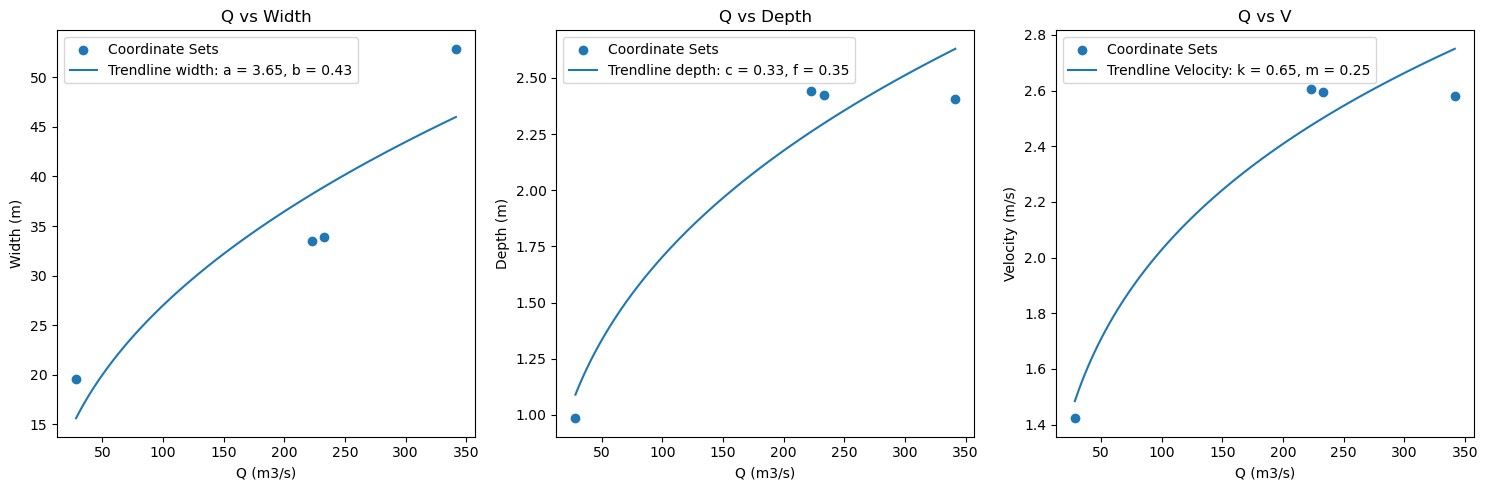

In [9]:
# Plotting three graphs side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
poptw, pcovw = curve_fit(lambda fx,a,b:a*fx**b, normal_discharges, total_widths)
poptd, pcovd = curve_fit(lambda fx,a,b:a*fx**b, normal_discharges, hydraulic_depths)
poptv, pcovv = curve_fit(lambda fx,a,b:a*fx**b, normal_discharges, velocitys)
Q_linspace = np.linspace(min(normal_discharges), max(normal_discharges), 100)
trend_width = poptw[0]*Q_linspace**poptw[1]
trend_depth = poptd[0]*Q_linspace**poptd[1]
trend_velocity = poptv[0]*Q_linspace**poptv[1]

# Plotting the first graph
axes[0].scatter( normal_discharges, total_widths, label='Coordinate Sets')
axes[0].set_title('Q vs Width')
axes[0].set_xlabel('Q (m3/s)')
axes[0].set_ylabel('Width (m)')
axes[0].plot(Q_linspace, trend_width, label = (f"Trendline width: a = {poptw[0]:.2f}, b = {poptw[1]:.2f}"))
axes[0].legend()


# Plotting the second graph
axes[1].scatter(normal_discharges, hydraulic_depths, label='Coordinate Sets')
axes[1].set_title('Q vs Depth')
axes[1].set_xlabel('Q (m3/s)')
axes[1].set_ylabel('Depth (m)')
axes[1].plot(Q_linspace, trend_depth, label = (f"Trendline depth: c = {poptd[0]:.2f}, f = {poptd[1]:.2f}"))
axes[1].legend()

# Plotting the third graph
axes[2].scatter(normal_discharges, velocitys, label='Coordinate Sets')
axes[2].set_title('Q vs V')
axes[2].set_xlabel('Q (m3/s)')
axes[2].set_ylabel('Velocity (m/s)')
axes[2].plot(Q_linspace, trend_velocity, label = (f"Trendline Velocity: k = {poptv[0]:.2f}, m = {poptv[1]:.2f}"))
axes[2].legend()

plt.tight_layout()
plt.show()

The found trendline parameters are used as Leopolds parameters

In [10]:
a = poptw[0]
c = poptd[0]
k = poptv[0]
b = poptw[1]
f = poptd[1]
m = poptv[1]

print("The equations of Leopolds parameters both have to be 1.0, if not the data is not viable")
print(f"a*c*k = {a*c*k:.1f} and b+f+m = {b+f+m:.1f}")

if abs(1-(a*c*k))>0.05 or abs(1-(b+f+m))>0.05:
    print("Stop!")
    sys.exit()

The equations of Leopolds parameters both have to be 1.0, if not the data is not viable
a*c*k = 0.8 and b+f+m = 1.0
Stop!


SystemExit: 

c:\Users\pjdeb\anaconda3\envs\hydromt-sfincs\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


At the end you get discharges based on the trendline

In [11]:
# Define a loop iterating through the lists
for width, depth, wetted_perimeter, hydraulic_depth, normal_discharge, name_sets in zip(total_widths, mean_depths, wetted_perimeters, hydraulic_depths, normal_discharges, name_sets):
    
    # Call the function inside the loop
    discharge_width, discharge_depth, discharge_velocity, average_discharge = calculate_Leopold(width, depth, slope, Manning_coefficient, wetted_perimeter, hydraulic_depth, a, c, k, b, f, m)
    
    # Do whatever you want with the results
    print(name_sets)
    print("Discharge Width:", discharge_width)
    print("Discharge Depth:", discharge_depth)
    print("Discharge Velocity:", discharge_velocity)
    print("Average Discharge:", average_discharge)
    print("Manning Discharge:", normal_discharge)
    print()

coords_riverspeed
Discharge Width: 47.45793788475618
Discharge Depth: 21.237958479611176
Discharge Velocity: 23.86400422769962
Average Discharge: 30.85330019735566
Manning Discharge: 28.305114816911697

coords_rivercanal23
Discharge Width: 169.09646368352398
Discharge Depth: 271.79724079417815
Discharge Velocity: 269.9419928023914
Average Discharge: 236.94523242669786
Manning Discharge: 232.99543985169953

coords_riverdown1
Discharge Width: 470.7569807838551
Discharge Depth: 265.822157237212
Discharge Velocity: 264.2919925457748
Average Discharge: 333.6237101889473
Manning Discharge: 341.4752933615623

coords_riverbegin2
Discharge Width: 164.4109027689317
Discharge Depth: 276.4579747678746
Discharge Velocity: 274.3449724542565
Average Discharge: 238.40461666368756
Manning Discharge: 222.78811879206347



Finally if you want to do one set of coordinates apart for the calculation of the Manning discharge due to the fact it is not part of the natural river.

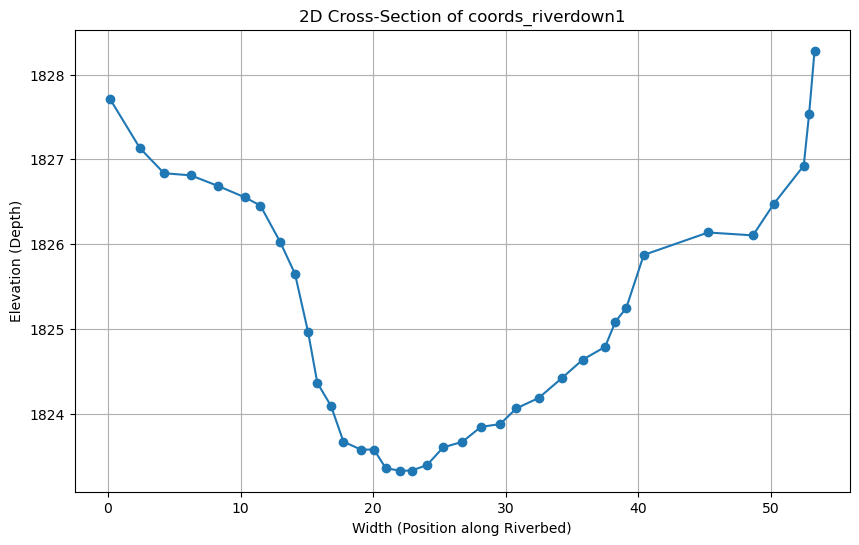

The total surface area of the trapezoidal sections is approximately 132.31 square meters.The mean depth is 2.50 meters.The maximum width is 52.88 meters. The wetted perimeter is 54.98 meter. The hydraulic depth is 2.41 meter.
Parameter           | Value
Velocity            | 2.58 m/s
Discharge Width     | 470.76 m3/s
Discharge Depth     | 265.82 m3/s
Discharge Velocity  | 264.29 m3/s
Average Discharge   | 333.62 m3/s
Manning Discharge   | 341.48 m3/s


In [12]:
# To check for mistakes in your cross section, you can graph the cross section here, one by one.

coords_with_elevations = coords_riverdown1
title_graph = ('2D Cross-Section of coords_riverdown1')

def visualize_riverbed_2d(coords_with_elevations, title_graph):
    num_points = len(coords_with_elevations)

    if num_points < 3:
        raise ValueError("You need at least 3 sets of coordinates with elevations to visualize a riverbed.")

    # Initialize lists to store width and elevation data
    width_values = []
    elevation_values = []

    for i in range(num_points):
        # Coordinates and elevations of two consecutive points
        lat1, lon1, elev1 = coords_with_elevations[i]

        if i == num_points - 1:
            # If this is the last point, calculate the width using the previous point
            lat2, lon2, elev2 = coords_with_elevations[i - 1]
        else:
            lat2, lon2, elev2 = coords_with_elevations[i + 1]

        # Calculate the width (distance between the two points)
        width = haversine(lat1, lon1, elev1, lat2, lon2, elev2)

        # Append width and elevation values to lists
        width_values.append(width)
        elevation_values.append(elev1)  # Use the elevation of the first point in each section

    # Create a 2D plot
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(width_values), elevation_values, marker='o', linestyle='-')

    # Add labels and title

    plt.xlabel('Width (Position along Riverbed)')
    plt.ylabel('Elevation (Depth)')
    plt.title(title_graph)

    # Show the plot
    plt.grid(True)
    plt.show()

visualize_riverbed_2d(coords_with_elevations, title_graph)

surface_area2, mean_depth2, total_width2, wetted_perimeter2, hydraulic_depth2 = calculate_surface_area(coords_with_elevations)


print(f"The total surface area of the trapezoidal sections is approximately {surface_area2:.2f} square meters." 
      f"The mean depth is {mean_depth2:.2f} meters."
      f"The maximum width is {total_width2:.2f} meters. "
      f"The wetted perimeter is {wetted_perimeter2:.2f} meter. "
      f"The hydraulic depth is {hydraulic_depth2:.2f} meter.")

discharge_width2, discharge_depth2, discharge_velocity2, average_discharge2 = calculate_Leopold(
    total_width2, mean_depth2, slope, Manning_coefficient, wetted_perimeter2, hydraulic_depth2, a, c, k, b, f, m)

velocity2 = calculate_velocity(slope, total_width2, mean_depth2, Manning_coefficient, wetted_perimeter2)

Manning_discharge2 = calculate_discharge(total_width2, mean_depth2, slope, Manning_coefficient, wetted_perimeter2)

print("Parameter           | Value")
print(f"Velocity            | {velocity2:.2f} m/s")
print(f"Discharge Width     | {discharge_width2:.2f} m3/s")
print(f"Discharge Depth     | {discharge_depth2:.2f} m3/s")
print(f"Discharge Velocity  | {discharge_velocity2:.2f} m3/s")
print(f"Average Discharge   | {average_discharge2:.2f} m3/s")
print(f"Manning Discharge   | {Manning_discharge2:.2f} m3/s")
